# Dimensionality Reduction using PCA - Lab

Here is the essence of the PCA labs, boiled down to some code that performs the normalisation and PCA and draws some useful charts.  Try to pull this into your library as a set of reusable functions.  Then take another data set and apply PCA to it using your library functions.

In [1]:
# Import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

% matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('foodusa.csv', index_col=0)
data.head()

Bread  Burger  Milk  Oranges  Tomatoes
City                                             
ATLANTA     24.5    94.5  73.9     80.1      41.6
BALTIMORE   26.5    91.0  67.5     74.6      53.3
BOSTON      29.7   100.8  61.4    104.0      59.6
BUFFALO     22.8    86.6  65.3    118.4      51.2
CHICAGO     26.7    86.7  62.7    105.9      51.2

In [32]:
# Standardise the data to have mean 0 and stdev 1
scaler = StandardScaler()
data_std = scaler.fit_transform(data)   # standardise
data_std = pd.DataFrame(data_std)       # turn into a data frame
data_std.columns = list(data)           # add the original column names back on
data_std

Bread    Burger      Milk   Oranges  Tomatoes
0  -0.322747  0.357765  1.707156 -1.643751 -0.963643
1   0.492987 -0.115920  0.765630 -2.038688  0.609878
2   1.798161  1.210398 -0.131763  0.072431  1.457158
3  -1.016120 -0.711410  0.441980  1.106449  0.327451
4   0.574560 -0.697876  0.059485  0.208864  0.327451
5   0.003547  1.440473  0.147753 -0.265061 -0.425687
6  -1.016120 -0.413665 -1.455784  0.567898 -0.264300
7  -0.812187 -0.860283  0.030062  1.070545 -0.936745
8  -0.485894  0.249494 -1.588186  0.481730  0.488838
9   1.635014  1.900624  2.633971  2.169189  1.739585
10 -1.220054 -1.117426  0.809764  0.402742 -0.856051
11  0.329840 -0.400131  0.456691 -0.150170 -0.748460
12  0.656134 -0.345996 -0.896753 -1.457053 -1.394007
13 -2.035787 -0.305394 -1.249825  0.632524  0.690571
14 -0.281960  0.046486 -1.529341  0.216045  0.260207
15  2.246814  2.550249  0.544960  0.309394  1.860625
16 -0.322747  0.060020  0.647939 -0.358409  1.739585
17  0.370627  0.479569 -0.308299  1.013100  0.071922
18  0.492987  0.073554 -0.220031  0.869486 -0.344993
19  0.085120 -1.103892 -0.779062 -0.731805 -1.797474
20  0.411413 -0.643741 -0.587814 -0.085544 -0.977091
21 -1.138480 -1.915923 -0.043494 -0.853876 -0.519829
22 -0.445107  0.263028  0.544960 -1.536041 -0.344993

In [5]:
# Perform principal component analysis on the standardised data
pca = PCA(n_components=5)
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
# Transform the data back into the shape we want
PC_df = pd.DataFrame(pca.transform(data_std), index=data.index, columns=['PC1','PC2','PC3','PC4','PC5'])
PC_df
# Need to generalise the above using something like: ['PC'+str(x) for x in range(1,6)]

PC1       PC2       PC3       PC4       PC5
City                                                           
ATLANTA       -0.232315  2.237819  0.988156  0.191210  0.838005
BALTIMORE      0.288023  1.926235 -0.123012  1.119293 -0.556394
BOSTON         2.298492  0.075243 -1.119221  0.128545 -0.535216
BUFFALO       -0.348852 -1.129927  1.266874  0.179167 -0.172921
CHICAGO        0.116322 -0.088027  0.067705 -0.181856 -0.955302
CINCINNATI     0.605998  0.461222 -0.328206 -0.144952  1.280462
CLEVELAND     -1.242714 -1.335505 -0.545012  0.116954  0.276876
DALLAS        -1.121562 -0.859501  0.888384 -0.792463  0.101632
DETROIT       -0.280792 -1.347375 -1.068822  0.450110  0.229038
HONALULU       4.168851 -0.505083  1.679008 -0.707832 -0.021562
HOUSTON       -1.316582 -0.151809  1.568518 -0.252855  0.085409
KANSAS CITY   -0.324461  0.615497  0.324138 -0.663170 -0.176748
LOS ANGELES   -1.211956  1.362077 -1.318964 -0.595443 -0.048366
MILWAUKEE     -1.118232 -1.882291 -0.000402  1.278795  0.497951
MINNEAPOLIS   -0.452064 -0.990662 -1.119893  0.301964  0.061731
NEW YORK       3.779884  0.259320 -1.015282  0.078561  0.121802
PHILADELPHIA   0.894790 -0.031577  0.523897  1.545749 -0.465568
PITTSBURGH     0.619647 -0.825288 -0.231855 -0.594162  0.148645
ST LOUIS       0.233133 -0.533188 -0.135660 -0.900584 -0.061574
SAN DIEGO     -1.932777  0.741302 -0.584736 -0.966685 -0.194057
SAN FRANCISCO -0.880164  0.194150 -0.493577 -0.854189 -0.324925
SEATTLE       -2.137999  0.375538  0.663857  0.566595 -0.703075
WASHINGTON DC -0.404672  1.431830  0.114106  0.697247  0.574155

In [16]:
# Get the explained variance for each PC as a %
exp_var_ratio = pca.explained_variance_ratio_
pca_explained_variance_cumsum = exp_var_ratio.cumsum()

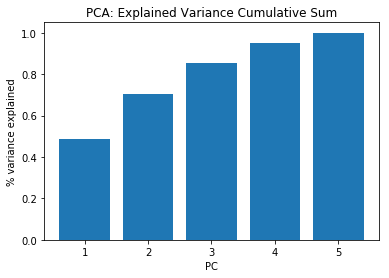

In [26]:
# Draw a chart of the cumulative sum of explained variance as each PC is added
index = np.arange(len(pca_explained_variance_cumsum))+1
plt.bar(index, pca_explained_variance_cumsum)
plt.xlabel("PC")
plt.ylabel("% variance explained")
plt.title("PCA: Explained Variance Cumulative Sum")

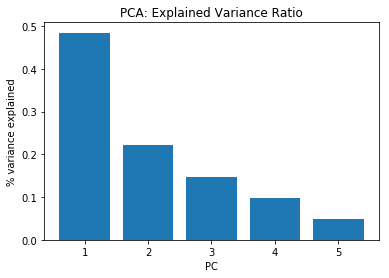

In [24]:
# Draw a chart of the explained variance for each PC
index = np.arange(len(exp_var_ratio))+1
plt.bar(index, exp_var_ratio)
plt.xlabel("PC")
plt.ylabel("% variance explained")
plt.title("PCA: Explained Variance Ratio")

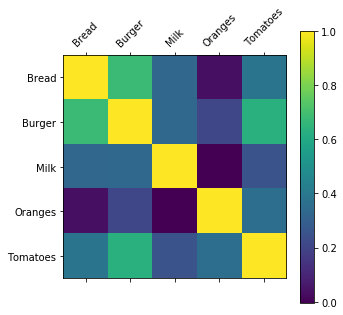

In [35]:
# Draw a chart showing correlation for original data
names = list(data)
fig, ax = plt.subplots(figsize=(5,5))
mat = ax.matshow(data.corr())
ax.set_xticks(np.arange(0,5,1))
ax.set_yticks(np.arange(0,5,1))
ax.set_xticklabels(names, rotation = 45)
ax.set_yticklabels(names)
fig.colorbar(mat)
plt.show();

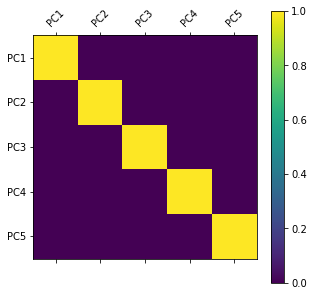

In [36]:
# Draw a chart showing correlation for PCA data (same code as above but with different data)
names = list(PC_df)
fig, ax = plt.subplots(figsize=(5,5))
mat = ax.matshow(PC_df.corr())
ax.set_xticks(np.arange(0,5,1))
ax.set_yticks(np.arange(0,5,1))
ax.set_xticklabels(names, rotation = 45)
ax.set_yticklabels(names)
fig.colorbar(mat)
plt.show();